In [78]:
#Library Imports
import kwant
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla
import numpy as np
import tinyarray as ta
import pylab
%matplotlib notebook

In [79]:
def hop_x(a, s_eye, s_y):
    '''
    Defines hopping energy constant in x direction.
    '''
    hopping_potential = -1/(2*a**2)*(s_eye) + 1j*(s_y)/(2*a)
    
    return hopping_potential

In [80]:
def hop_y(a, s_eye, s_x):
    '''
    Defines hoppping energy constant in y direction.
    '''
    hopping_potential = -1/(2*a**2)*(s_eye) - 1j*(s_x)/(2*a)
    
    return hopping_potential

In [81]:
def onSite(a, s_eye, mu):
    '''
    Defines on-site energy constant.
    '''
    onsite_potential = 1/(a**2)*(s_eye) + mu
    
    return onsite_potential

In [82]:
def plot_energies(fig_num, a, L, W, mu_range, s_eye, s_x, s_y, s_z):
    '''
    Confirms system can support zero energy modes.
    Plots energy versus a variable pairing potential (delta).
    '''
    energies = []
    
    for mu in mu_range:
        energies.append(np.sort(energy(a, L, W, mu, s_eye, s_x, s_y, s_z)))

    plt.figure(fig_num)
    plt.title("Energy vs Chemical Potential")
    plt.plot(mu_range, energies)
    
    plt.ylabel("Energy (eV)")
    plt.xlabel("Chemical Potential (eV/mol)")
    plt.show()
    print(energies)

In [83]:
def energy(a, L, W, mu, s_eye, s_x, s_y, s_z):  #energy(a, L, W, mu, delta, s_eye, s_x, s_y, s_z, Vx):
    '''
    Computes lowest energy eigenvalues of system.
    '''
    #Hamiltonian
    sys = kwant.Builder()

    #Lattice Definitions
    lat_e = kwant.lattice.square(a, name='e')
    lat_h = kwant.lattice.square(a, name='h')

    #Hamiltonian
    
    for i in range(L):
        for j in range(W):
            sys[lat_e(i,j)] = onSite(a, s_eye, mu) #On-site (electrons)
            sys[lat_h(i,j)] = -onSite(a, s_eye, mu) #On-site (holes)

            if (i > 0) and (j > 0):
                #x-direction
                sys[lat_e(i-1,j), lat_e(i,j)] = hop_x(a, s_eye, s_y)
                sys[lat_h(i-1,j), lat_h(i,j)] = -hop_x(a, s_eye, s_y)
                
                #y-direction
                sys[lat_e(i,j-1), lat_e(i,j)] = hop_y(a, s_eye, s_x)
                sys[lat_h(i,j-1), lat_h(i,j)] = -hop_y(a, s_eye, s_x)

    ham_mat = sys.finalized().hamiltonian_submatrix(sparse=True)
    ev = sla.eigsh(ham_mat, k=8, which='SM', return_eigenvectors=False, maxiter = 1000000)
    
    return ev


In [ ]:
def phase_diagram(fig_num, a, L, W, s_eye, s_x, s_y, s_z, mu, delta, Vx_range):
    '''
    Plots a phase diagram of triviality vs. C_0. Mu and Vx remain constant while delta changes.
    '''
    C_arr = []
    triviality = [] #Trivial (1); Non-trivial (2)
  
    for Vx in Vx_range:
        min_ev = np.amin(np.absolute(energy(a, L, W, s_eye, s_x, s_y, s_z, mu, delta, Vx)))
        print(min_ev)
        
        if min_ev < (10**(-11)): #C_0 > 0:
            triviality.append(2)
        
        elif min_ev == (10**(-11)): #C_0 == 0:
            triviality.append(1.5)
        
        else:
            triviality.append(1)
    
    plt.figure(fig_num)
    plt.scatter(C_arr, triviality) #Note that plt.plot is slightly slower than plt.scatter.
    plt.draw()
    
    plt.ylabel("Non-Trivial = 2, Boundary = 1.5, Trivial = 1")
    plt.xlabel("C_0")
    plt.title("1D Phase Diagram: Triviality vs. Delta", y = 1.0)

In [ ]:
'''
Trial 1 (100x2)
'''
#System Parameters
a = 1.
W = 2
L = 200
mu_range = np.linspace(0, 0.2, 10)
fig_num = 1

#Pauli Matrices
s_eye = ta.array([
        [1, 0], 
        [0, 1]
        ]) 
    
s_x = ta.array([ 
        [0, 1],
        [1, 0]
        ])
    
s_y = ta.array([ 
        [0,-1j],
        [1j, 0] 
        ])

s_z = ta.array([ 
        [1, 0],
        [0,-1] 
        ])

%time plot_energies(fig_num, a, L, W, mu_range, s_eye, s_x, s_y, s_z)

<IPython.core.display.Javascript object>


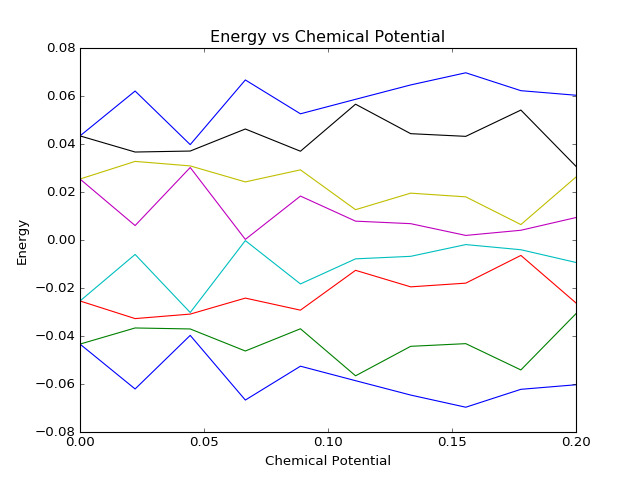

[array([-0.0433709 , -0.0433709 , -0.02540839, -0.02540839,  0.02540839,
        0.02540839,  0.0433709 ,  0.0433709 ]), array([-0.06206894, -0.03665486, -0.03274923, -0.00601742,  0.00601742,
        0.03274923,  0.03665486,  0.06206894]), array([-0.03973841, -0.0370643 , -0.03087254, -0.03021125,  0.03021125,
        0.03087254,  0.0370643 ,  0.03973841]), array([-0.06668893, -0.04625063, -0.02420772, -0.00024864,  0.00024864,
        0.02420772,  0.04625063,  0.06668893]), array([-0.05258139, -0.03698842, -0.02923193, -0.01830378,  0.01830378,
        0.02923193,  0.03698842,  0.05258139]), array([-0.05862072, -0.05658632, -0.01263728, -0.00785389,  0.00785389,
        0.01263728,  0.05658632,  0.05862072]), array([-0.06460872, -0.04430289, -0.0195207 , -0.00680637,  0.00680637,
        0.0195207 ,  0.04430289,  0.06460872]), array([-0.0696755 , -0.0431866 , -0.01797491, -0.00190648,  0.00190648,
        0.01797491,  0.0431866 ,  0.0696755 ]), array([-0.06221839, -0.05413963, -0.006

In [100]:
'''
Trial 2 (100x2)
'''
#System Parameters
a = 1.
W = 40
L = 2
mu_range = np.linspace(0, 0.2, 10)
fig_num = 2

#Pauli Matrices
s_eye = ta.array([
        [1, 0], 
        [0, 1]
        ]) 
    
s_x = ta.array([ 
        [0, 1],
        [1, 0]
        ])
    
s_y = ta.array([ 
        [0,-1j],
        [1j, 0] 
        ])

s_z = ta.array([ 
        [1, 0],
        [0,-1] 
        ])

%time plot_energies(fig_num, a, L, W, mu_range, s_eye, s_x, s_y, s_z)

In [87]:
#Seems like "run all" is faster than "run selected"